In [1]:
%matplotlib widget

import os
import sys
import matplotlib.pyplot as plt
from IPython import embed
import pickle

sys.path.append(os.path.abspath("/develop/code/evaluation"))
import evaluation_3 as eval

Using MPI version 4.0, 1 processes


Global seed set to 1337


In [ ]:
exp_name = "baseline" # 0. phase | 1. curv | 2. recon/thermo | 3. phase/thermo 

loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = eval.get_results(exp_name, stage=0)
eval.plot_loss(loss, loss, loss, loss, "stage 0 - phase")

In [ ]:
# loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = get_results(exp_name, stage=1)
# plt.close("all")
# eval.plot_loss(loss, loss, loss, loss, "stage 1 - der")

In [ ]:
# loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = get_results(exp_name, stage=1, folder_name = "baseline_1_nockpt")
# plt.close("all")
# eval.plot_loss(loss, loss, loss, loss, "stage 1 - der - no checkpoint")

In [ ]:
# loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = get_results(exp_name, stage=2)
# plt.close("all")
# eval.plot_loss(loss, loss, loss, loss, "stage 2 - recon + thermo")

In [ ]:
eval.plot_dft_fields(resim_train_eval['nf_1550_truth'], resim_train_eval['nf_1550_pred'], resim_train_results['all_near_fields']['near_fields_1550'], idx=1, id="train")

In [ ]:
eval.plot_dft_fields(resim_valid_eval['nf_1550_truth'], resim_valid_eval['nf_1550_pred'], resim_valid_results['all_near_fields']['near_fields_1550'], idx=1, id="valid")

In [ ]:
loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval, resim_train_results, resim_valid_results = eval.get_results(exp_name, stage=3, resim=True, resim_index=1)
plt.close("all")
eval.plot_loss(loss, loss, loss, loss, "stage 3 - thermo + phase")

In [ ]:
phase_train_truth, phase_train_pred = encoder_train['phase_truth'].flatten(), encoder_train['phase_pred'].flatten()
phase_valid_truth, phase_valid_pred = encoder_valid['phase_truth'].flatten(), encoder_valid['phase_pred'].flatten()
der_train_truth, der_train_pred = encoder_train['deriv_truth'].flatten(), encoder_train['deriv_pred'].flatten()
der_valid_truth, der_valid_pred = encoder_valid['deriv_truth'].flatten(), encoder_valid['deriv_pred'].flatten()
int_train_truth, int_train_pred = encoder_train['intensity_truth'].flatten(), encoder_train['intensity_pred'].flatten()

plt.close("all")
title = "training end"
eval.regression_plots(title, phase_train_truth, phase_train_pred, phase_valid_truth, phase_valid_pred, der_train_truth, der_train_pred, der_valid_truth, der_valid_pred, save_fig=False)

In [ ]:
_, _, _, _, _, resim_train_eval, resim_valid_eval, _, _ = eval.get_results(exp_name, stage=0, resim=True, resim_index=1)
eval.plot_dft_fields(resim_train_eval['nf_1550_truth'], resim_train_eval['nf_1550_pred'], resim_train_results['all_near_fields']['near_fields_1550'], idx=1, id="train")

In [ ]:
eval.plot_dft_fields(resim_valid_eval['nf_1550_truth'], resim_valid_eval['nf_1550_pred'], resim_valid_results['all_near_fields']['near_fields_1550'], idx=1, id="valid")

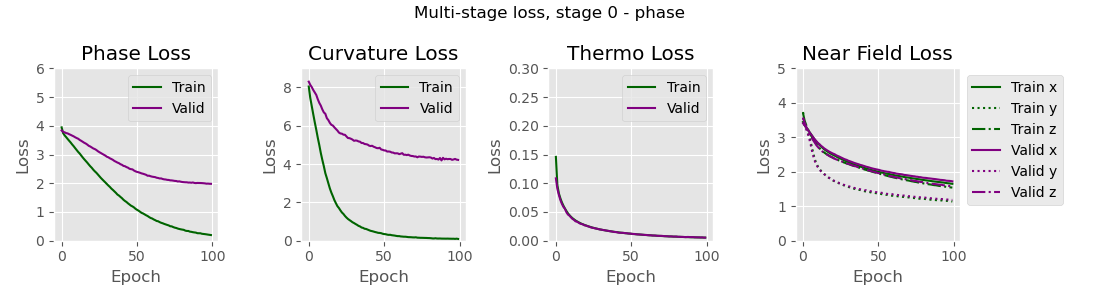

In [3]:
exp_name = "all_on" # 0. phase | 1. curv | 2. recon/thermo | 3. phase/thermo 

loss, encoder_train, recon_train, encoder_valid, recon_valid, resim_train_eval, resim_valid_eval = eval.get_results(exp_name, stage=None, folder_name = exp_name)
eval.plot_loss(loss, loss, loss, loss, "stage 0 - phase")

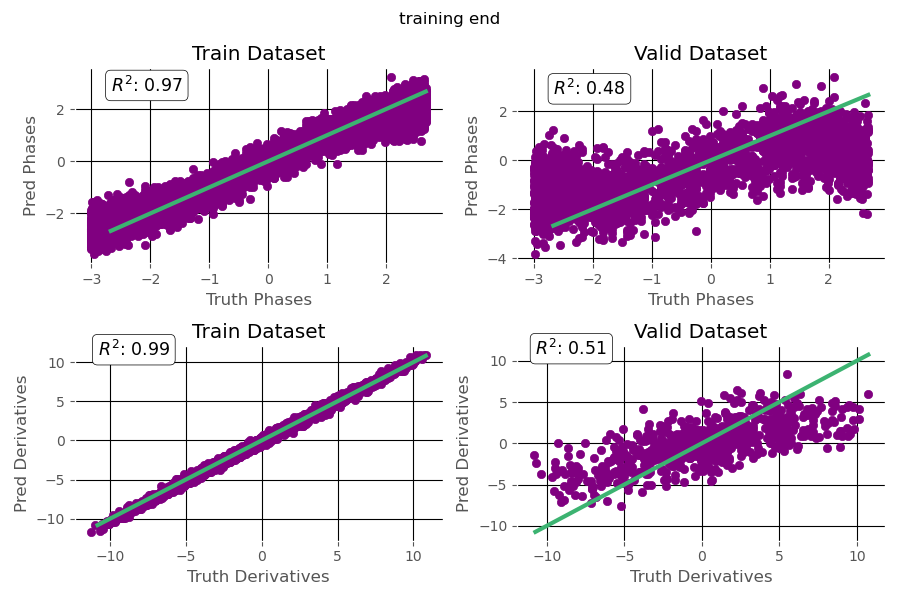

In [4]:
phase_train_truth, phase_train_pred = encoder_train['phase_truth'].flatten(), encoder_train['phase_pred'].flatten()
phase_valid_truth, phase_valid_pred = encoder_valid['phase_truth'].flatten(), encoder_valid['phase_pred'].flatten()
der_train_truth, der_train_pred = encoder_train['deriv_truth'].flatten(), encoder_train['deriv_pred'].flatten()
der_valid_truth, der_valid_pred = encoder_valid['deriv_truth'].flatten(), encoder_valid['deriv_pred'].flatten()
int_train_truth, int_train_pred = encoder_train['intensity_truth'].flatten(), encoder_train['intensity_pred'].flatten()

plt.close("all")
title = "training end"
eval.regression_plots(title, phase_train_truth, phase_train_pred, phase_valid_truth, phase_valid_pred, der_train_truth, der_train_pred, der_valid_truth, der_valid_pred, save_fig=False)

In [5]:
plt.close("all")
eval.plot_dft_fields(resim_train_eval['nf_1550_truth'], resim_train_eval['nf_1550_pred'], resim_train_results['all_near_fields']['near_fields_1550'], idx=1, id="train")
eval.plot_dft_fields(resim_valid_eval['nf_1550_truth'], resim_valid_eval['nf_1550_pred'], resim_valid_results['all_near_fields']['near_fields_1550'], idx=1, id="valid")

NameError: name 'resim_train_results' is not defined